## Import Relevant Packages / Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
pd.set_option('max_columns', 75)
import seaborn as sns
import wordcloud
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer 

## Reading in the CSV from Data Acquisition Notebook

In [3]:
reddits = pd.read_csv('./reddits.csv')

In [4]:
# inspecting the data
reddits

,target,selftext,title
0,depression,2019 was probably one of the worst year of my ...,Hello 2020 and fuck you 2019.
1,depression,I saw your post on this subreddit. I saw that ...,To my new hopeful friend on the other side of ...
2,depression,"I feel like I've been hanging on by a thread, ...",can't imagine making it to 2030
3,depression,NaN,Why do I have the strongest urge to jump out o...
4,depression,I've been clean from self harm for over two ye...,Suicidal thoughts are so intense
...,...,...,...
3995,anxiety,So i know a kid who threatened to shoot my sch...,School sucks
3996,anxiety,Just dropped out of school. I realized that my...,Drop out
3997,anxiety,"My anxiety tells me I'm worthless, and that p...",Having a hard time
3998,anxiety,Last weekend I finally told my parents about m...,Finally seeing a doctor


## EDA and Cleaning:

In [5]:
# there are some rows where the selftext feature has been deleted or remvoed. 
# filtering these out of the dataframe
reddits = reddits[reddits['selftext'] != '[removed]']
reddits = reddits[reddits['selftext'] != '[deleted]']

# the action above removed 187 rows of data
reddits.shape

(3822, 3)

In [6]:
# checking for null_values and found 145 rows
reddits.isnull().sum()
# will fill these with 'blank post'

reddits['selftext'] = reddits['selftext'].fillna('blank post')
#reddits = reddits['selftext'].dropna()

In [7]:
# now there are no nulls
reddits.isnull().sum()

target      0
selftext    0
title       0
dtype: int64

In [8]:
# modifying target column and I will set 'depression' to the positive class (1)
# and 'anxiety' to the negative class (0)
reddits['target'] = reddits['target'].map({'depression':1, 'anxiety':0})

In [9]:
# ensuring that there are no duplicate posts included in our dataframe
reddits.drop_duplicates(keep='first', inplace=True)
# removes 6 duplicate posts
reddits.shape

(3801, 3)

In [10]:
reddits['word_count'] = reddits['selftext'].apply(lambda x: len(str(x).split()))

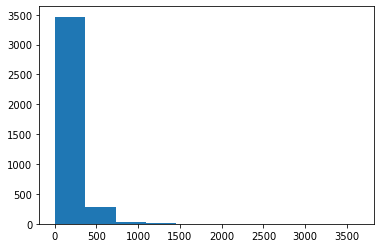

In [11]:
plt.hist(reddits['word_count'], bins=10);

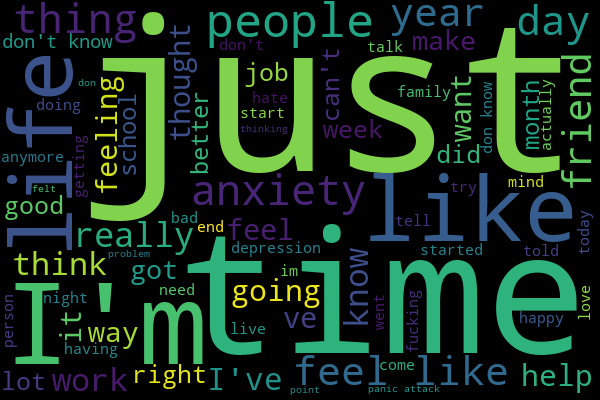

In [12]:
stops = list(ENGLISH_STOP_WORDS) + ['said', 'say']
wc = wordcloud.WordCloud(width=600, height=400, max_words=75, stopwords=stops)

text = reddits['selftext'].str.cat()

wc.generate_from_text(text);

wc.to_image()

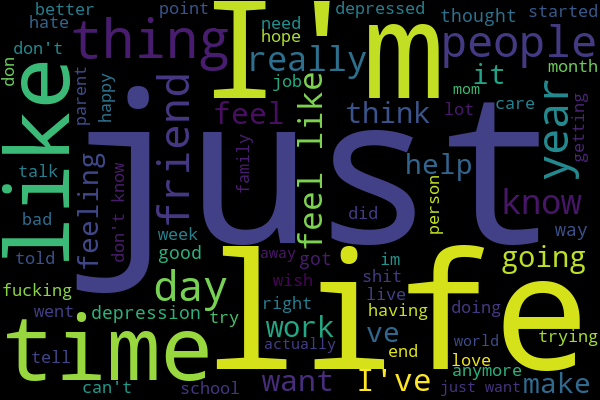

In [13]:
depression = reddits[reddits['target'] == 1]

stops = list(ENGLISH_STOP_WORDS) + ['said', 'say']
wc = wordcloud.WordCloud(width=600, height=400, max_words=75, stopwords=stops)

text = depression['selftext'].str.cat()

wc.generate_from_text(text);

wc.to_image()

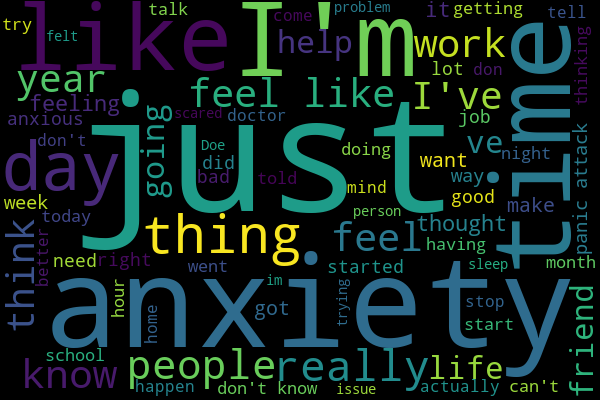

In [14]:
anxiety = reddits[reddits['target'] == 0]

stops = list(ENGLISH_STOP_WORDS) + ['said', 'say']
wc = wordcloud.WordCloud(width=600, height=400, max_words=75, stopwords=stops)

text = anxiety['selftext'].str.cat()

wc.generate_from_text(text);

wc.to_image()

In [16]:
custom_stop = list(ENGLISH_STOP_WORDS)
cv = CountVectorizer(stop_words=custom_stop, min_df=6)
vect_df = pd.DataFrame(cv.fit_transform(reddits['selftext']).todense(), columns= \
                      cv.get_feature_names())

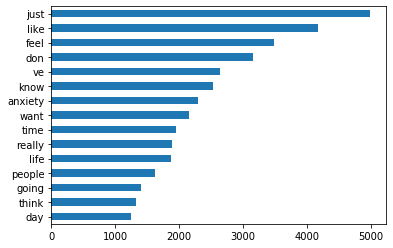

In [17]:
# visualizing the 15 most frequent words in the combined data
vect_df.sum().sort_values().tail(15).plot.barh();

In [18]:
top_words = list(vect_df.sum().sort_values().tail(15).index)

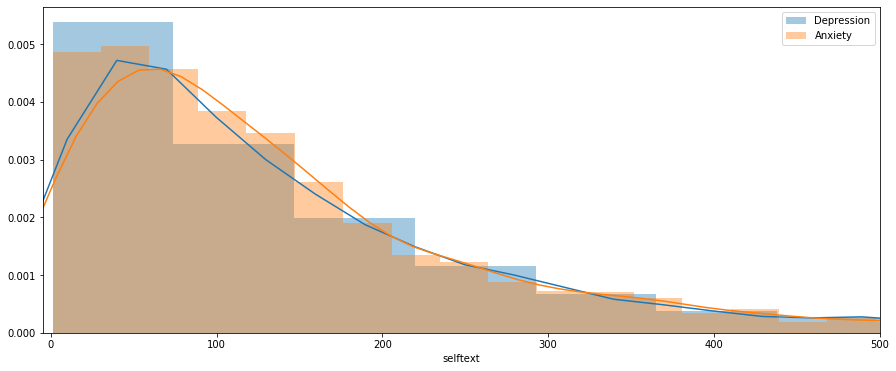

In [19]:
def get_len(subreddit):
    return reddits.loc[reddits['target'] == subreddit, 'selftext'].map(lambda x: len(x.split()))

depression_len = get_len(1)
anxiety_len = get_len(0)

fig, ax = plt.subplots(figsize=(15,6))
sns.distplot(depression_len, label='Depression')
sns.distplot(anxiety_len, label='Anxiety')
ax.set_xbound(-5,500)
ax.legend();

### Exporting Data that has been cleaned and evaluated for use in modeling in a new workbook

In [20]:
reddits.to_csv('./reddits_cleaned_for_modeling.csv', index=False)